# Ensemble Methods

* Also known as *Committee Machines*.
* Improve the accuracy of a given statistical learning model by combining *weak* classifiers (it is one that is only slightly better than a random guessing) to form a *strong* classifier.
* The ensemble estimate is given by

$$
\hat{f}_{\mathrm{ens}} (\boldsymbol{x})= \sum_{m=1}^{M} \alpha_m\hat{f}_m(\boldsymbol{x}),
$$

where $\hat{f}_m$ is built from a base procedure (usually decision trees) on the $m$th reweighted data.

* It diminishes the generalization error by reducing the:
    * Variance (*Bagging* and *Random Forests*)
    * Bias (*Boosting*)

# Bagging

* Decision trees are known to be unstable due to small perturbations of $\mathcal{D}$ may change radically the predictions.

* Bagging (Boostrap aggregating, Breiman (1996)) was introduced to reduce the variance of a predictor.

* It is an ensemble method where $\alpha_m=1/M$, i.e.,

$$\hat{f}_{\mathrm{bag}} (\boldsymbol{x})= \frac{1}{M}\sum_{m=1}^{M} \hat{f}_m(\boldsymbol{x})$$

* Decision trees $\hat{f}_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x})$ is the most often used base procedure, where $\boldsymbol{\theta}$ governs the tree in terms of its split features and points at each node, and terminal-node values.

* If $\{\hat{f}_m\}_{m=1}^M$ are i.i.d, then

$$
	\begin{split}
	\mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_M}\left(\hat{f}_{\mathrm{bag}}(\boldsymbol{x})\right)
	&= \mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_M}\left(\frac{1}{M}\sum_{m=1}^{M} \hat{f}_{\mathcal{D},\boldsymbol{\theta}_m}(\boldsymbol{x})\right)\\
	&=\frac{1}{M^2}\sum_{m=1}^{M}\mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_m}\left( \hat{f}_{\mathcal{D},\boldsymbol{\theta}_m}(\boldsymbol{x})\right)\\
	&= \frac{\sigma^2_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x})}{M} \to 0,\quad\text{ as }M\to\infty.
	\end{split}
$$

#### Bagging algorithm

1. Obtain bootstrap samples $\mathcal{D}^{*b}=\left\lbrace(\boldsymbol{x}^{*b}_i,y^{*b}_i)_{i=1}^n\right\rbrace$, $b=1,\ldots,B$ from $\mathcal{D}$ by randomly drawing $n$ times with replacement.


2. Compute bootstrapped estimators

$$\hat{f}^{*b}(\cdot)=\hat{f}^{*b}\left((\boldsymbol{x}^{*b}_1,y^{*b}_1),\ldots,(\boldsymbol{x}^{*b}_n,y^{*b}_n) \right),\quad b=1,\ldots,B.$$

3. Compute the bagged estimator

$$\hat{f}_{\mathrm{bag}} (\boldsymbol{x})= \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{*b}(\boldsymbol{x}).$$


### Out-of-bag (OOB) generalization error estimation
* It is a way to get the test error of a bagged model without to perform Cross-Validation.
* Approximately 37\% of original instances are left out in $\mathcal{D}^{*b}$, called the "_out-of-bag_" sample, $\bar{\mathcal{D}}^{b}=\mathcal{D}\setminus\mathcal{D}^{*b}$.
* The OOB sample can be used as an independent test set.
* The OOB error estimate
$$
\widehat{\mathrm{Err}}_{\mathrm{OOB}}\left( \hat{f}_\mathrm{bag}\right)  = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{n_B}\sum_{b=1}^{B} I_{\left[ (\boldsymbol{x}_i,y_i)\notin\mathcal{D}^{*b}\right] } L\left( y_i,\hat{f}^{*b}(\boldsymbol{x}_i)\right),
$$
where $n_B =\sum_{b=1}^{B} I_{\left[ (\boldsymbol{x}_i,y_i)\notin\mathcal{D}^{*b}\right]}$.	

# Load data

In [1]:
from pandas import read_csv

names = ["classes","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]
data = read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', names=names)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.describe()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
data = data.drop(columns=['veil-type']) # remove "veil-type" due to it is constant
data.head()
#data = data.astype('str')

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


# Split into train and test datasets

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['classes'])
y = data['classes']
#y = y.values.reshape((len(y), 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

print('Train:', X_train.shape, y_train.shape)
print('Test:',  X_test.shape, y_test.shape)

Train: (5686, 21) (5686,)
Test: (2438, 21) (2438,)


# Encode categorical variables

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# encode categorical features as an integer array
#def prepare_inputs(X_train, X_test):
#    oe = OrdinalEncoder()
#    oe.fit(X_train)
#    X_train_enc = oe.transform(X_train)
#    X_test_enc = oe.transform(X_test)
#    return X_train_enc, X_test_enc

# one-hot encoding of categorical features
#def prepare_inputs(X_train, X_test):
#    ohe = OneHotEncoder()
#    ohe.fit(X_train)
#    X_train_enc = ohe.transform(X_train)
#    X_test_enc = ohe.transform(X_test)
#    return X_train_enc, X_test_enc

# Also
#import pandas as pd
def prepare_inputs(X_train, X_test):
    X_train_enc = pd.get_dummies(X_train, columns=X_train.columns, drop_first=False)
    X_test_enc  = pd.get_dummies(X_test, columns=X_test.columns, drop_first=False)
    return X_train_enc, X_test_enc

# encode target labels with values between 0 and n_classes-1
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train, X_test = prepare_inputs(X_train, X_test)
y_train, y_test = prepare_targets(y_train, y_test)

print('X train:', X_train.shape)
print('X test:', X_test.shape)

X train: (5686, 116)
X test: (2438, 116)


# Training

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# specification
b = DecisionTreeClassifier(
                           criterion='gini',    # 'gini' or 'entropy' impurity functions
                           max_depth=None,      # maximum depth of the tree
#                          min_samples_split=2, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
#                          ccp_alpha=0.075,
                           random_state=77
                          )

f = BaggingClassifier(
                      base_estimator=b,
                      n_estimators=100,
                      oob_score=False,
                      random_state=77
                      )

# training
f = f.fit(X_train, y_train)
f
# also f.set_params()

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=77,
  

# Tuning hyperparameter

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

f = BaggingClassifier(base_estimator=b, random_state=77)
# define grid search
#n_estimators = range(0, 210, 10)
n_estimators = range(1, 51)
grid = dict(n_estimators=n_estimators)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 1.000000 using {'n_estimators': 3}
0.999648 with: {'n_estimators': 1}
0.999648 with: {'n_estimators': 2}
1.000000 with: {'n_estimators': 3}
1.000000 with: {'n_estimators': 4}
1.000000 with: {'n_estimators': 5}
0.999824 with: {'n_estimators': 6}
1.000000 with: {'n_estimators': 7}
0.999824 with: {'n_estimators': 8}
0.999824 with: {'n_estimators': 9}
0.999824 with: {'n_estimators': 10}
0.999824 with: {'n_estimators': 11}
0.999824 with: {'n_estimators': 12}
0.999824 with: {'n_estimators': 13}
0.999824 with: {'n_estimators': 14}
0.999824 with: {'n_estimators': 15}
0.999824 with: {'n_estimators': 16}
0.999824 with: {'n_estimators': 17}
0.999824 with: {'n_estimators': 18}
0.999824 with: {'n_estimators': 19}
0.999824 with: {'n_estimators': 20}
0.999824 with: {'n_estimators': 21}
0.999824 with: {'n_estimators': 22}
0.999824 with: {'n_estimators': 23}
0.999824 with: {'n_estimators': 24}
0.999824 with: {'n_estimators': 25}
0.999824 with: {'n_estimators': 26}
0.999824 with: {'n_estimators': 

In [8]:
f = BaggingClassifier(base_estimator=b, oob_score=True, random_state=77)

min_estimators = 1
max_estimators = 20

oob_error   = []
train_error = []
test_error  = []
for m in range(min_estimators, max_estimators + 1):
    f.set_params(n_estimators = m)
    f.fit(X_train, y_train)
    # errors
    oob_error.append(1 - f.oob_score_)
    train_error.append(1 - f.score(X_train, y_train))
    test_error.append(1 - f.score(X_test, y_test))

/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/pyt

/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/pyth

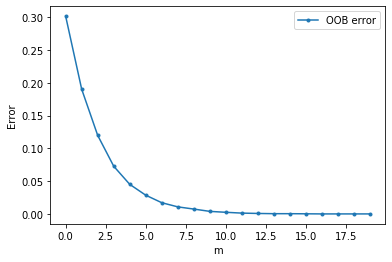

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel('m')
ax.set_ylabel('Error')
ax.plot(oob_error, marker='.', label='OOB error')
#ax.plot(train_error, marker='o', label='Train error')
#ax.plot(test_error, marker='o', label='Test error')
ax.legend()
plt.show()

# Prediction

In [12]:
import numpy as np

f = BaggingClassifier(base_estimator=b, n_estimators = 7, random_state=77)
f = f.fit(X_train, y_train)

y_pred = f.predict(X_test)
p_pred = f.predict_proba(X_test)

np.concatenate((y_test.reshape(y_test.shape[0],1), y_pred.reshape(y_pred.shape[0],1), p_pred), axis=1)

array([[1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.],
       ...,
       [1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.]])

# Prediction accuracy

Accuracy: 1.0
Confusion Matrix: [[1300    0]
 [   0 1138]]


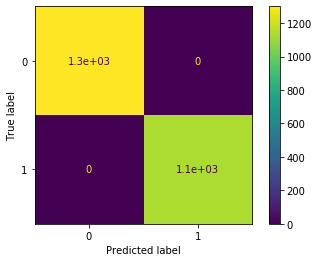

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      1138

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



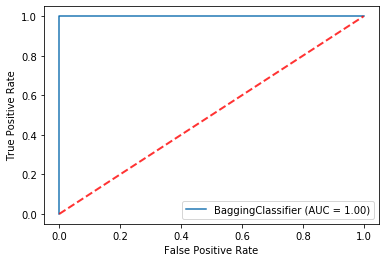

1.0

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(f, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred))
#print(metrics.roc_curve(y_test, y_pred))
metrics.plot_roc_curve(f, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()
metrics.roc_auc_score(y_test, y_pred)

# Random Forests

* A random forest is an ensemble of multiple *randomized* decision trees

$$\hat{f}(\boldsymbol{x})= \frac{1}{B}\sum_{b=1}^{B}\hat{f}\left(\boldsymbol{x};\hat{\boldsymbol{\theta}}_b\right)$$

* Trees in the ensemble are built from bootstrap samples of $\mathcal{D}$ (i.e. bagging) but also, injecting randomness in order to get decorrelated trees.

* The idea is to improve the variance of bagging by reducing the correlation $\rho$ between trees, without increasing the variance $\sigma^2$ too much,
 
 $$\mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_M}\left(\hat{f}_{\mathrm{bag}}(\boldsymbol{x})\right)=\rho_{\mathcal{D},\boldsymbol{\theta}_l,\boldsymbol{\theta}_m}(\boldsymbol{x})\sigma^2_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x}) + \frac{1-\rho_{\mathcal{D},\boldsymbol{\theta}_l,\boldsymbol{\theta}_m}(\boldsymbol{x})}{M}\sigma^2_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x})$$

    * If $\rho(\boldsymbol{x})<1$, $\mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_M}\left(\hat{f}_{\mathrm{bag}}(\boldsymbol{x})\right)<\sigma^2_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x})$
    * If $\rho(\boldsymbol{x})\to0$, $\mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_M}\left(\hat{f}_{\mathrm{bag}}(\boldsymbol{x})\right)\to\sigma^2_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x})/M\to0$, as $M\to\infty$.
    * If $\rho(\boldsymbol{x})\to1$, $\mathrm{Var}_{\mathcal{D},\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_M}\left(\hat{f}_{\mathrm{bag}}(\boldsymbol{x})\right)\to\sigma^2_{\mathcal{D},\boldsymbol{\theta}}(\boldsymbol{x})$.

### Random Forest algorithm

1. For $b= 1,\ldots,B$:

    * Draw a bootstrap sample $\mathcal{D}^{\ast b}$ of size $n$ from $\mathcal{D}$.
    * Grow a tree $f^{\ast b}$ from $\mathcal{D}^{\ast b}$ by recursively repeating the next steps:
    
        * At each node randomly select a subset $m<p$ from the $p$ features.
        * Find the best variable/split $\hat{s}_j$, $j=1,\ldots,m$, among the $m$ features.
        * Grow $f^{\ast b}$ to a maximum depth with no pruning (until a $n_{\min}$ node is got).

2. Prediction at a new point $\boldsymbol{x}$:
    
    * Regression: $\hat{f}_{\mathrm{rf}}(\boldsymbol{x})= \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{\ast b} \left(\boldsymbol{x};\hat{\boldsymbol{\theta}}_b\right)$
    * Classification: $\hat{f}_{\mathrm{rf}}(\boldsymbol{x})=\arg\max_{k\in\mathcal{Y}}\sum_{b=1}^{B} I\left( \hat{f}^{\ast b}(\boldsymbol{x};\hat{\boldsymbol{\theta}}_b)=k\right)$
    
Typically values for $m$ and $n_{\min}$ are:

   * Classification: $m=\lfloor\sqrt{p}\rfloor$ and $n_{\min}=1$
   * Regression: $m =\lfloor p/3\rfloor$ and $n_{\min}=5$

# Training

In [14]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           n_estimators=11,
                           criterion='gini',    # “entropy”
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=2, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           max_features='auto', # “auto”, then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                           )

f = f.fit(X_train, y_train)
f

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False)

# Tuning Hyperparameter

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

f = RandomForestClassifier(
                           n_estimators=100,
                           criterion='gini',    # “entropy”
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=2, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           max_features='auto', # “auto”, then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                          )

# define grid search
n_estimators = range(1, 101)
grid = dict(n_estimators=n_estimators)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 1.000000 using {'n_estimators': 2}
0.999648 with: {'n_estimators': 1}
1.000000 with: {'n_estimators': 2}
1.000000 with: {'n_estimators': 3}
1.000000 with: {'n_estimators': 4}
1.000000 with: {'n_estimators': 5}
1.000000 with: {'n_estimators': 6}
1.000000 with: {'n_estimators': 7}
1.000000 with: {'n_estimators': 8}
1.000000 with: {'n_estimators': 9}
1.000000 with: {'n_estimators': 10}
1.000000 with: {'n_estimators': 11}
1.000000 with: {'n_estimators': 12}
1.000000 with: {'n_estimators': 13}
1.000000 with: {'n_estimators': 14}
1.000000 with: {'n_estimators': 15}
1.000000 with: {'n_estimators': 16}
1.000000 with: {'n_estimators': 17}
1.000000 with: {'n_estimators': 18}
1.000000 with: {'n_estimators': 19}
1.000000 with: {'n_estimators': 20}
1.000000 with: {'n_estimators': 21}
1.000000 with: {'n_estimators': 22}
1.000000 with: {'n_estimators': 23}
1.000000 with: {'n_estimators': 24}
1.000000 with: {'n_estimators': 25}
1.000000 with: {'n_estimators': 26}
1.000000 with: {'n_estimators': 

In [16]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           n_estimators=100,
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=2, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

min_estimators = 1
max_estimators = 20

oob_error   = []
train_error = []
test_error  = []
for m in range(min_estimators, max_estimators + 1):
    f.set_params(n_estimators = m)
    f.fit(X_train, y_train)
    # errors
    oob_error.append(1 - f.oob_score_)
    train_error.append(1 - f.score(X_train, y_train))
    test_error.append(1 - f.score(X_test, y_test))

/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/python3.7/s

/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/santiagogallon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/santiagogallon/opt/anaconda3/lib/python3.7/si

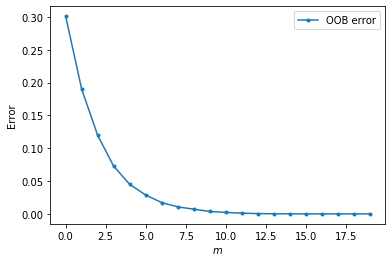

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(r'$m$')
ax.set_ylabel('Error')
ax.plot(oob_error, marker='.', label='OOB error')
#ax.plot(train_error, marker='o', label='Train error')
#ax.plot(test_error, marker='o', label='Test error')
ax.legend()
plt.show()

# Prediction

In [18]:
import numpy as np

f = RandomForestClassifier(
                           n_estimators=7,
                           criterion='gini',    # “entropy”
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=2, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           max_features='auto', # “auto”, then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                          )

f = f.fit(X_train, y_train)
y_pred = f.predict(X_test)

np.concatenate((y_test.reshape(y_test.shape[0],1), y_pred.reshape(y_pred.shape[0],1), p_pred), axis=1)

array([[1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.],
       ...,
       [1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.]])

# Prediction accuracy

Accuracy: 1.0
Confusion Matrix: [[1300    0]
 [   0 1138]]


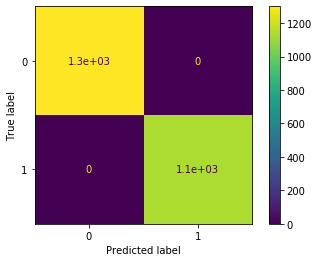

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      1138

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



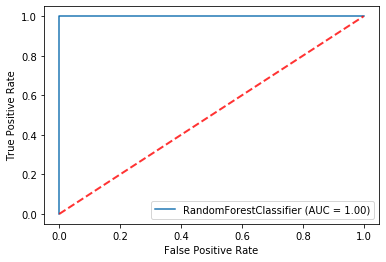

1.0

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(f,X_test,y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred))
#print(metrics.roc_curve(y_test, y_pred))
metrics.plot_roc_curve(f,X_test,y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()
metrics.roc_auc_score(y_test, y_pred)

# Feature importance

In some situations, the aim is not only to make accurate predictions of $Y$ but also to identify most relevant features.

## Variable importance measures:


### Mean Decrease Impurity (MDI)

* Measure of relative importance of an input variable $X_j$ for predicting $Y$

$$
\mathrm{Imp}(X_j) = \frac{1}{B}\sum_{b=1}^{B}\sum_{t=1}^{T_m}I(v_t=j) \left[p(t)\Delta i(s_{t}, t)\right],
$$

where $v_t$ is the splitting variable at node $t$, $p(t)=n_t/n$, and $\Delta i(s_{t},t)$ the impurity decrease.

* Using the Gini index $i_\mathrm{G}(t)$, $\mathrm{Imp}(\cdot)$ is called the *Gini importance* or *Mean Decrease Gini*.


### Mean Decrease Accuracy (MDA)

* Randomly permutes the values of $X_j$ in the out-of-bag (OOB) samples.
* It is also known as the *permutation importance*.
* $X_j$ is important for $Y$ if breaking their link  increases the prediction error
* The breaking is given by randomly permute the values of $X_j$.
* Difference of averages of $\tiny{\mathrm{OOB}}$ prediction errors before and after permutation %$\small{X_j}$

$$
\mathrm{Imp}_\pi(X_j)
	= \frac{1}{B}\sum_{b=1}^{B}\left[ \frac{1}{|\bar{\mathcal{D}}_{\pi(j)}^{b}|}\sum_{(\boldsymbol{x}_{i,\pi(j)},y_i)\in\bar{\mathcal{D}}_{\pi(j)}^{b}} L\left( y_i,\hat{f}_{\mathcal{D}^{*b}}(\boldsymbol{x}_{i,\pi(j)})\right) - \frac{1}{|\bar{\mathcal{D}}^{b}|}\sum_{(\boldsymbol{x}_i,y_i)\in\bar{\mathcal{D}}^{b}} L\left( y_i,\hat{f}_{\mathcal{D}^{*b}}(\boldsymbol{x}_i)\right)\right],
$$

where $\bar{\mathcal{D}}^{b}$ is the $b$th $\mathrm{OOB}$ sample, and $\small{\bar{\mathcal{D}}_{\pi(j)}^{b}}$ the corresponding $b$th permuted $\mathrm{OOB}$ sample by random permutations of the values of $X_j$.

odor_n                        0.092213
gill-size_n                   0.075929
bruises_f                     0.073744
gill-size_b                   0.069079
stalk-surface-below-ring_s    0.063381
odor_f                        0.055425
population_v                  0.053151
habitat_g                     0.036195
spore-print-color_h           0.034351
stalk-color-above-ring_w      0.029871
stalk-surface-below-ring_k    0.028031
stalk-root_b                  0.026520
gill-spacing_c                0.026202
habitat_u                     0.022737
stalk-root_c                  0.021950
dtype: float64


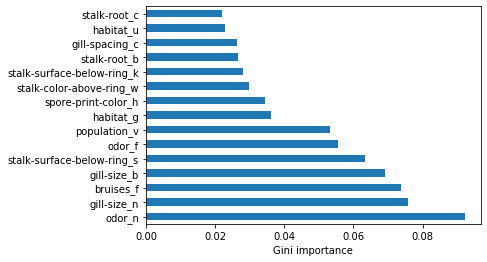

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(f.feature_importances_, index=X_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
#plt.ylabel('Feature')
plt.show()

spore-print-color_h    0.010582
spore-print-color_r    0.002871
population_v           0.002379
habitat_g              0.000082
dtype: float64


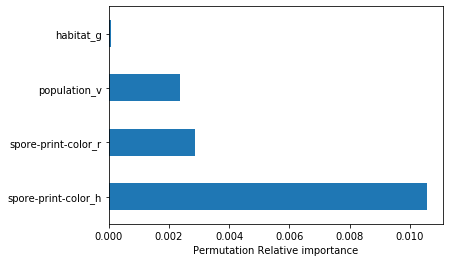

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feat_import = permutation_importance(f, X_test, y_test, n_jobs=2, random_state=77)

feat_importances = pd.Series(feat_import.importances_mean, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(4))

feat_importances.nlargest(4).plot(kind='barh', color='#1f77b4')
plt.xlabel('Permutation Relative importance')
plt.show()

# Boosting

* It sequentially trains the classifiers $\{f_m\}_{m=1}^M$ on *weighted* versions of data, giving higher weights to misclassified cases.

* Predictions are combined through a weighted majority vote to produce the final prediction:

$$
f(\boldsymbol{x}) = \mathrm{sign}\left[\sum_{m=1}^{M} \alpha_m f_m(\boldsymbol{x})\right]
$$

where $\alpha_m$ weights $f_m$ by giving higher influence to more accurate classifiers.

$$
	\begin{split}
	&\text{Weighted data 1}\quad\ \ \xrightarrow{\text{base learner}}\quad f_1(\boldsymbol{x})\\
	&\text{Weighted data 2}\quad\ \ \xrightarrow{\text{base learner}}\quad f_2(\boldsymbol{x})\\
	&\qquad\quad\ \vdots\qquad\qquad\quad\ \vdots\quad\qquad\ \vdots\\
	&\text{Weighted data }M\quad \xrightarrow{\text{base learner}}\quad f_M(\boldsymbol{x})\\
	&\text{Ensembling:}\qquad\quad\ \ f(\boldsymbol{x}) = \mathrm{sign}\left[\sum_{m=1}^{M} \alpha_m f_m(\boldsymbol{x})\right]\\
	\end{split}
$$

* Tree-based methods are the most popular base learner.

* The ensemble in $f(\boldsymbol{x})$ follows the form of a *basis expansion*,
$$
f(\boldsymbol{x})=\sum_{m=1}^{M}\beta_mh(\boldsymbol{x};\boldsymbol{\gamma}_m).
$$

where $\{h(\boldsymbol{x};\boldsymbol{\gamma}_m)\}$ are *base learners* with parameter vectors $\{\boldsymbol{\gamma}_m\}$, and $\{\beta_m\}$ are expansion coefficients.

#### Forward stagewise algorithm:

$\{\beta_m,\boldsymbol{\gamma}_m\}$ can be obtained by:
	
1. Start with a initial guess $f^{(0)}(\boldsymbol{x})$ (known as the *offset* value).
2. For $m=1,\ldots,M$:

    * Compute
    
    $$(\beta_m,\boldsymbol{\gamma}_m)=\arg\min_{\beta,\boldsymbol{\gamma}}\sum_{i=1}^{n}L\left(y_i,f^{(m-1)}(\boldsymbol{x}_i) + \beta h(\boldsymbol{x}_i;\boldsymbol{\gamma})\right).
$$

    * Set $f^{(m)}(\boldsymbol{x}) = f^{(m-1)}(\boldsymbol{x}) + \beta_mh(\boldsymbol{x};\boldsymbol{\gamma}_m)$.


## Gradient Boosting

* Boosting can be attained by *numerical optimization* (Friedman, 2001), by using the **_gradient steepest-descent_** algorithm to obtain

$$	\hat{f}(\boldsymbol{x})=\arg\min_{f\in\mathcal{F}}\mathbb{E}_{Y|\boldsymbol{x}}\left(L(Y,f(\boldsymbol{x}))\right),\quad \mathcal{F}\ \text{ Space of functions}.
$$

where the update is given by a step-size $\rho_m$ in the direction of the negative gradient $g_m$ at $f^{(m-1)}$,

$$
\begin{split}
f^{(m)}(\boldsymbol{x}) 
&= f^{(m-1)}(\boldsymbol{x}) +f_m(\boldsymbol{x})\\
&= f^{(m-1)}(\boldsymbol{x}) -\rho_mg_m(\boldsymbol{x}),\quad\rho_m>0,
\end{split}
$$

with

$$g_m(\boldsymbol{x})=\left[\frac{\partial L(y_i,f(\boldsymbol{x}_i))}{\partial f(\boldsymbol{x}_i)}\right]_{f(\boldsymbol{x}_i)=f^{(m-1)}(\boldsymbol{x}_i)} ,\quad i=1,\ldots,n.
$$

## Regularization

* The main hyperparameter of boosting is the number of iterations $M$.
* At each iteration the training risk is usually reduced, thus for $M$ large enough it can be made arbitrarily small leading to overfitting.
* Regularization can be achieved through early stopping.
* Unlike bagging and random forests, boosting can overfit if $M$ is too large.
* An optimal number of $M$ can be obtained by Cross-Validation.
* Regularization through shrinkage methods is also other possible strategy
* Usually a shrinkage (also learning rate) parameter $0<\nu\leq1$ is included,

$$
\begin{split}
f^{(m)}(\boldsymbol{x})&= f^{(m-1)}(\boldsymbol{x}) + \nu f_m(\boldsymbol{x})\\
f(\boldsymbol{x})&= \sum_{m=0}^{M}\nu f_m(\boldsymbol{x})
\end{split}
$$

* There is a trade-off between $\nu$ and $M$.
* Smaller values of $\nu$ (more shrinkage) increase $M$ (more computing time), while the predictive accuracy is potentially better.
* The choice of $\nu$ is not crucial. The best way is set $\nu\leq 0.1$, and determine $M$ by early stopping.

# Training

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

f = GradientBoostingClassifier(
                               loss='deviance',     # using loss='exponential' yields the AdaBoost algorithm
                               n_estimators=100,    # number of boosting stages
                               learning_rate=1.0,   # shrinkage (or learning rate) parameter
                               subsample=1.0,       # if subsample < 1.0 yields the Stochastic Gradient Boosting
                               max_depth=3,         # maximum depth of the tree
                               min_samples_split=2, # minimum number of samples required to split an internal node
                               min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                               max_features=None,   # number of features to consider
                               random_state=77
                              )

f.fit(X_train, y_train)
f

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=77, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Tuning Hyperparameters 

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# grid search
n_estimators = range(1, 21)
grid = dict(n_estimators=n_estimators)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
# results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 1.000000 using {'n_estimators': 11}
0.985930 with: {'n_estimators': 1}
0.993845 with: {'n_estimators': 2}
0.996482 with: {'n_estimators': 3}
0.997713 with: {'n_estimators': 4}
0.998768 with: {'n_estimators': 5}
0.999472 with: {'n_estimators': 6}
0.999648 with: {'n_estimators': 7}
0.999648 with: {'n_estimators': 8}
0.999648 with: {'n_estimators': 9}
0.999824 with: {'n_estimators': 10}
1.000000 with: {'n_estimators': 11}
1.000000 with: {'n_estimators': 12}
1.000000 with: {'n_estimators': 13}
1.000000 with: {'n_estimators': 14}
1.000000 with: {'n_estimators': 15}
1.000000 with: {'n_estimators': 16}
1.000000 with: {'n_estimators': 17}
1.000000 with: {'n_estimators': 18}
1.000000 with: {'n_estimators': 19}
1.000000 with: {'n_estimators': 20}


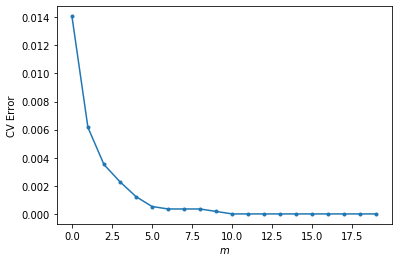

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(r'$m$')
ax.set_ylabel('CV Error')
ax.plot(1-means, marker='.', label='CV Error')
#ax.plot(train_error, marker='o', label='Train error')
#ax.plot(test_error, marker='o', label='Test error')
#ax.legend()
plt.show()

#  Optimal $M$ by early stopping

In [25]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 500

f_es = GradientBoostingClassifier(
                                  loss='deviance',         # using loss='exponential' yields the AdaBoost algorithm
                                  learning_rate=1.0,       # shrinkage (or learning rate) parameter
                                  subsample=1.0,           # if subsample < 1.0 yields the Stochastic Gradient Boosting
                                  max_depth=3,             # maximum depth of the tree
                                  min_samples_split=2,     # minimum number of samples required to split an internal node
                                  min_samples_leaf=1,      # minimum number of samples required to be at a leaf node
                                  max_features=None,       # number of features to consider
                                  #                              
                                  n_estimators=n_estimators,
                                  validation_fraction=0.2, # proportion of training data to set as validation set for early stopping
                                  n_iter_no_change=10,     # No. of iterations to early stopping will be used to finish training when validation score is not improving
                                  tol=0.01,                # tolerance for the early stopping
                                  random_state=77
                                 )

f = GradientBoostingClassifier(
                               loss='deviance',     # using loss='exponential' yields the AdaBoost algorithm
                               learning_rate=1.0,   # shrinkage (or learning rate) parameter
                               subsample=1.0,       # if subsample < 1.0 yields the Stochastic Gradient Boosting
                               max_depth=3,         # maximum depth of the tree
                               min_samples_split=2, # minimum number of samples required to split an internal node
                               min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                               max_features=None,   # number of features to consider
                               #
                               n_estimators=n_estimators,
                               random_state=77
                              )

f.fit(X_train, y_train)
f_es.fit(X_train, y_train)

print('Mean accuracy without early stopping:', f.score(X_test, y_test))
print('Mean accuracy with early stopping:', f_es.score(X_test, y_test))
print('No. of selected estimators by early stopping:', f_es.n_estimators_)

Mean accuracy without early stopping: 1.0
Mean accuracy with early stopping: 1.0
No. of selected estimators by early stopping: 16


# Prediction

In [26]:
import numpy as np

M = f_es.n_estimators_
f = GradientBoostingClassifier(
                               loss='deviance',     # using loss='exponential' yields the AdaBoost algorithm
                               n_estimators=M,     # number of boosting stages
                               learning_rate=1.0,
                               subsample=1.0,       # if subsample < 1.0 yields the Stochastic Gradient Boosting
                               max_depth=3,         # maximum depth of the tree
                               min_samples_split=2, # minimum number of samples required to split an internal node
                               min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                               max_features=None,   # number of features to consider
                               random_state=77
                              )
f = f.fit(X_train, y_train)
y_pred = f.predict(X_test)

np.concatenate((y_test.reshape(y_test.shape[0],1), y_pred.reshape(y_pred.shape[0],1), p_pred), axis=1)

array([[1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.],
       ...,
       [1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.]])

# Accuracy

Accuracy: 1.0
Confusion Matrix: [[1300    0]
 [   0 1138]]


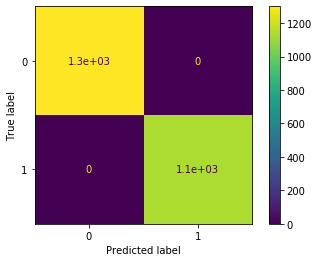

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      1138

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



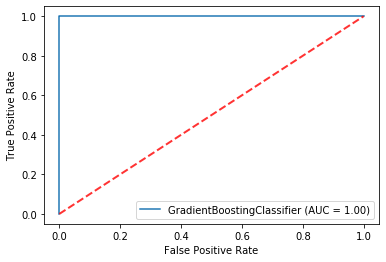

1.0

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(f,X_test,y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred))
#print(metrics.roc_curve(y_test, y_pred))
metrics.plot_roc_curve(f,X_test,y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()
metrics.roc_auc_score(y_test, y_pred)

# Feature importance

odor_n                        0.615832
stalk-root_c                  0.169413
stalk-surface-below-ring_y    0.098262
spore-print-color_r           0.038639
spore-print-color_u           0.024866
odor_a                        0.014419
stalk-color-below-ring_w      0.014353
odor_l                        0.013917
stalk-shape_e                 0.003421
dtype: float64


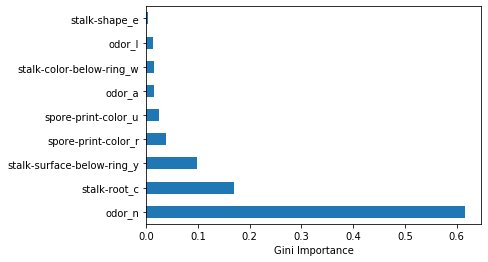

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(f.feature_importances_, index=X_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(9))

feat_importances.nlargest(9).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini Importance')
plt.show()

odor_n                        0.436013
odor_l                        0.074077
odor_a                        0.060541
spore-print-color_r           0.010664
stalk-surface-below-ring_y    0.004676
dtype: float64


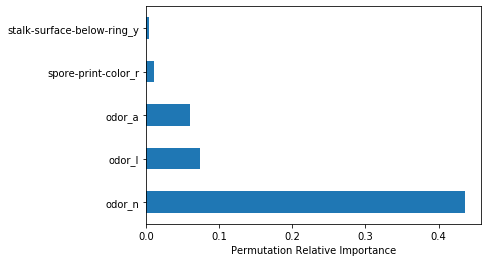

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feat_import = permutation_importance(f, X_test, y_test, n_jobs=2)

feat_importances = pd.Series(feat_import.importances_mean, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(5))

feat_importances.nlargest(5).plot(kind='barh', color='#1f77b4')
plt.xlabel('Permutation Relative Importance')
plt.show()